# Итоговый проект ML Junior

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import roc_curve
import pylab as plt
from sklearn.feature_selection import SelectPercentile

## 1. Загрузка датасета

In [13]:
# df = pd.read_csv('D:\\Мои документы\\ML\\ML Junior\\data.csv')
df = pd.read_csv('data.csv')
df

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,4,1,3,4,1,0,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,4,1,3,4,1,0,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,4,1,2,3,1,1,1,0
3,0,4,4,1,9,12,16,7,12,2,...,3,3,4,1,3,1,1,0,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,4,1,3,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26162712,2499999,11,3,9,4,3,1,12,6,2,...,3,3,4,1,3,4,1,1,0,0
26162713,2499999,12,3,9,1,15,12,6,9,3,...,3,3,4,1,3,4,1,0,0,0
26162714,2499999,13,2,9,4,8,1,11,7,3,...,3,3,4,1,2,3,1,1,1,0
26162715,2499999,14,2,9,4,9,1,15,16,2,...,3,3,4,1,3,4,1,1,0,0


Выведем список колонок

In [4]:
df.columns

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit',
       'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 

Выведем информацию о датасете

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26162717 entries, 0 to 26162716
Data columns (total 62 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int64
 1   rn                             int64
 2   pre_since_opened               int64
 3   pre_since_confirmed            int64
 4   pre_pterm                      int64
 5   pre_fterm                      int64
 6   pre_till_pclose                int64
 7   pre_till_fclose                int64
 8   pre_loans_credit_limit         int64
 9   pre_loans_next_pay_summ        int64
 10  pre_loans_outstanding          int64
 11  pre_loans_total_overdue        int64
 12  pre_loans_max_overdue_sum      int64
 13  pre_loans_credit_cost_rate     int64
 14  pre_loans5                     int64
 15  pre_loans530                   int64
 16  pre_loans3060                  int64
 17  pre_loans6090                  int64
 18  pre_loans90                    int64
 19

Выведем информацию о пропусках в итоговом датасете в %

In [11]:
sum(df.isna().sum() * 100 / len(df))
# Пропусков нет

0.0

In [13]:
col = df.columns
for i in col:
    print(f'Характеристика: {i}')
    print(f'Количество уникальных значений:{len(df[i].unique())}')
    print(f'Список значений:\n {df[i].value_counts()}\n')

Характеристика: id
Количество уникальных значений:3000000
Список значений:
 2891734    58
1782755    55
1658519    54
62963      51
508303     51
           ..
2349517     1
1108612     1
883552      1
1903673     1
2531540     1
Name: id, Length: 3000000, dtype: int64

Характеристика: rn
Количество уникальных значений:58
Список значений:
 1     3000000
2     2779455
3     2550810
4     2320731
5     2094188
6     1876509
7     1668536
8     1473997
9     1294408
10    1130303
11     982254
12     850192
13     733250
14     630295
15     540573
16     457926
17     383308
18     315058
19     254553
20     201566
21     156755
22     120002
23      90835
24      67755
25      50452
26      37382
27      27698
28      20450
29      15053
30      11050
31       8006
32       5815
33       4185
34       2964
35       2063
36       1447
37        987
38        662
39        441
40        280
41        178
42        123
43         75
44         41
45         32
46         17
47         12


Количество уникальных значений:2
Список значений:
 1    18258067
0     7904650
Name: is_zero_util, dtype: int64

Характеристика: is_zero_over2limit
Количество уникальных значений:2
Список значений:
 1    24334366
0     1828351
Name: is_zero_over2limit, dtype: int64

Характеристика: is_zero_maxover2limit
Количество уникальных значений:2
Список значений:
 1    22383950
0     3778767
Name: is_zero_maxover2limit, dtype: int64

Характеристика: enc_paym_0
Количество уникальных значений:4
Список значений:
 0    24136144
3     1109198
1      853844
2       63531
Name: enc_paym_0, dtype: int64

Характеристика: enc_paym_1
Количество уникальных значений:4
Список значений:
 0    21792098
3     2733662
1     1521366
2      115591
Name: enc_paym_1, dtype: int64

Характеристика: enc_paym_2
Количество уникальных значений:4
Список значений:
 0    20686082
3     4008468
1     1362284
2      105883
Name: enc_paym_2, dtype: int64

Характеристика: enc_paym_3
Количество уникальных значений:4
Список значений

# 2. Подготовка фичей к обучению

### 2.1 Вариант 1

В этом варианте будем использовать все доступные фичи без преобразования

Из датасета удалим порядковый номер кредитного продукта, т.к. он не несет полезной информации информации.

In [3]:
df1 = df.drop(columns=['rn', 'flag'])
del df
df1

,id,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,18,9,2,3,16,10,11,3,3,...,3,3,3,4,1,3,4,1,0,0
1,0,18,9,14,14,12,12,0,3,3,...,0,0,0,4,1,3,4,1,0,0
2,0,18,9,4,8,1,11,11,0,5,...,0,0,0,4,1,2,3,1,1,1
3,0,4,1,9,12,16,7,12,2,3,...,3,3,3,4,1,3,1,1,0,0
4,0,5,12,15,2,11,12,10,2,3,...,3,3,3,4,1,3,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26162712,2499999,3,9,4,3,1,12,6,2,3,...,3,3,3,4,1,3,4,1,1,0
26162713,2499999,3,9,1,15,12,6,9,3,3,...,3,3,3,4,1,3,4,1,0,0
26162714,2499999,2,9,4,8,1,11,7,3,5,...,3,3,3,4,1,2,3,1,1,1
26162715,2499999,2,9,4,9,1,15,16,2,3,...,3,3,3,4,1,3,4,1,1,0


Получим список колонок более, чем с 2-мя уникальными значениями для дальнейшего кодирования

In [5]:
category_columns = []
col1 = df1.drop(columns=['id']).columns
for i in col1:
    if len(df1[i].unique()) > 2:
        category_columns.append(i)
        
category_columns   

['pre_since_opened',
 'pre_since_confirmed',
 'pre_pterm',
 'pre_fterm',
 'pre_till_pclose',
 'pre_till_fclose',
 'pre_loans_credit_limit',
 'pre_loans_next_pay_summ',
 'pre_loans_outstanding',
 'pre_loans_max_overdue_sum',
 'pre_loans_credit_cost_rate',
 'pre_loans5',
 'pre_loans530',
 'pre_loans3060',
 'pre_loans6090',
 'pre_loans90',
 'pre_util',
 'pre_over2limit',
 'pre_maxover2limit',
 'enc_paym_0',
 'enc_paym_1',
 'enc_paym_2',
 'enc_paym_3',
 'enc_paym_4',
 'enc_paym_5',
 'enc_paym_6',
 'enc_paym_7',
 'enc_paym_8',
 'enc_paym_9',
 'enc_paym_10',
 'enc_paym_11',
 'enc_paym_12',
 'enc_paym_13',
 'enc_paym_14',
 'enc_paym_15',
 'enc_paym_16',
 'enc_paym_17',
 'enc_paym_18',
 'enc_paym_19',
 'enc_paym_20',
 'enc_paym_21',
 'enc_paym_22',
 'enc_paym_23',
 'enc_paym_24',
 'enc_loans_account_holder_type',
 'enc_loans_credit_status',
 'enc_loans_credit_type',
 'enc_loans_account_cur']

In [27]:
del df
# del data1
# del ohe


Закодируем найденные фичи в бинарном формате

In [6]:

data1 = df1[category_columns]
ohe = OneHotEncoder(sparse=False, drop='first', dtype='int8')
ohe.fit(data1)

df1.drop(columns=category_columns, inplace=True)
df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)

df1

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe.fit_transform(data1)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\2073082297.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

,id,pre_loans_total_overdue,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,...,enc_loans_credit_type_1,enc_loans_credit_type_2,enc_loans_credit_type_3,enc_loans_credit_type_4,enc_loans_credit_type_5,enc_loans_credit_type_6,enc_loans_credit_type_7,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3
0,0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
1,0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,1,1,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26162712,2499999,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
26162713,2499999,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
26162714,2499999,0,1,0,1,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
26162715,2499999,0,1,0,1,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0


In [9]:
del data1
del ohe

Сгрупирируем признаки по колонке id

In [10]:
df1 = df1.groupby(by=['id']).sum()
df1

,pre_loans_total_overdue,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,pclose_flag,...,enc_loans_credit_type_1,enc_loans_credit_type_2,enc_loans_credit_type_3,enc_loans_credit_type_4,enc_loans_credit_type_5,enc_loans_credit_type_6,enc_loans_credit_type_7,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3
id,,,,,,,,,,,,,,,,,,,,,
0,0,9,10,10,10,10,6,9,9,1,...,1,0,2,7,0,0,0,10,0,0
1,0,12,10,12,12,11,10,12,11,1,...,3,0,3,8,0,0,0,14,0,0
2,0,3,2,2,2,3,1,3,2,2,...,0,0,2,1,0,0,0,3,0,0
3,0,15,15,15,15,15,8,14,14,5,...,1,0,4,9,1,0,0,15,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,0,9,5,11,11,11,8,11,7,2,...,0,0,4,6,0,0,1,11,0,0
2999996,0,12,13,12,13,13,9,11,11,5,...,0,0,4,8,0,0,1,13,0,0
2999997,0,9,7,10,10,10,6,10,9,1,...,0,0,3,7,0,0,0,10,0,0


т.к. датасет занимает много памяти сохраним его

In [11]:
df1.to_csv('df1_ml_junior.csv', index=False)

In [12]:
del df1

### 2.2 Вариант 2

В этом варианте варинте я выбиру наиболее подходящие фичи. Такими фичами я считаю те, которые относятся к просроченным платежам, к размеру кредита, и размерам будующих платежей

In [14]:
columns2 = ["id", "pre_loans_next_pay_summ", "pre_loans_credit_cost_rate", "pre_loans5", "pre_loans530", "pre_loans3060", 
       "pre_loans6090", "pre_loans90", "is_zero_loans5", "is_zero_loans530", "is_zero_loans3060", 
       "is_zero_loans6090", "is_zero_loans90", "pre_util", "pre_over2limit", "pre_maxover2limit"]

In [15]:
df2 = df[columns2]
del df
df2

,id,pre_loans_next_pay_summ,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit
0,0,3,11,6,16,5,4,8,1,1,1,1,1,16,2,17
1,0,3,11,6,16,5,4,8,1,1,1,1,1,16,2,17
2,0,0,8,6,16,5,4,8,1,1,1,1,1,15,2,17
3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17
4,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26162712,2499999,2,7,6,16,5,4,8,1,1,1,1,1,16,2,17
26162713,2499999,3,11,6,16,5,4,8,1,1,1,1,1,16,2,17
26162714,2499999,3,5,6,16,5,4,8,1,0,1,1,1,1,2,3
26162715,2499999,2,2,6,16,5,4,8,1,0,1,1,1,16,2,0


Получим список колонок более, чем с 2-мя уникальными значениями для дальнейшего кодировани

In [18]:
category_columns2 = []
col1 = df2.drop(columns=['id']).columns
for i in col1:
    if len(df2[i].unique()) > 2:
        category_columns2.append(i)
        
category_columns2 

['pre_loans_next_pay_summ',
 'pre_loans_credit_cost_rate',
 'pre_loans5',
 'pre_loans530',
 'pre_loans3060',
 'pre_loans6090',
 'pre_loans90',
 'pre_util',
 'pre_over2limit',
 'pre_maxover2limit']

In [21]:
data2 = df2[category_columns2]
ohe = OneHotEncoder(sparse=False, drop='first', dtype='int8')
ohe.fit(data2)

df2.drop(columns=category_columns2, inplace=True)
df2[ohe.get_feature_names_out()] = ohe.fit_transform(data2)

df2

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=category_columns2, inplace=True)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ohe.get_feature_names_out()] = ohe.fit_transform(data2)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ohe.get_feature_names_out()] = ohe.fit_transform(data2)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ohe.get_feature_names_out()] = ohe.fit_transform(data2)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ohe.get_feature_names_out()] = ohe.fit_transform(data2)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ohe.get_feature_names_out()] = ohe.fit_transform(data2)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[ohe.get_feature_names_out()] = ohe.fit_transform(data2)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[ohe.get_feature_names_out()] = ohe.fit_transform(data2)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1898317833.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[ohe.get_feature_names_out()] = ohe.fit_transform(data2)


,id,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,...,pre_maxover2limit_10,pre_maxover2limit_11,pre_maxover2limit_12,pre_maxover2limit_13,pre_maxover2limit_14,pre_maxover2limit_15,pre_maxover2limit_16,pre_maxover2limit_17,pre_maxover2limit_18,pre_maxover2limit_19
0,0,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26162712,2499999,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26162713,2499999,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26162714,2499999,1,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26162715,2499999,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Сгрупирируем признаки по колонке id

In [22]:
data2 = df2.groupby(by=['id']).sum()
data2

,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,pre_loans_next_pay_summ_5,...,pre_maxover2limit_10,pre_maxover2limit_11,pre_maxover2limit_12,pre_maxover2limit_13,pre_maxover2limit_14,pre_maxover2limit_15,pre_maxover2limit_16,pre_maxover2limit_17,pre_maxover2limit_18,pre_maxover2limit_19
id,,,,,,,,,,,,,,,,,,,,,
0,9,10,10,10,10,0,3,2,1,3,...,0,0,0,0,0,0,0,9,0,0
1,12,10,12,12,11,1,10,0,1,1,...,1,0,0,0,0,0,0,12,0,0
2,3,2,2,2,3,2,1,0,0,0,...,0,1,0,0,0,0,0,2,0,0
3,15,15,15,15,15,1,9,2,2,0,...,0,0,0,0,0,0,0,14,0,0
4,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,9,5,11,11,11,0,9,1,1,0,...,0,0,0,0,0,0,0,11,0,0
2999996,12,13,12,13,13,1,12,0,0,0,...,0,0,0,0,0,0,0,11,0,0
2999997,9,7,10,10,10,2,6,0,1,0,...,0,0,0,0,0,0,0,9,0,0


In [23]:
del ohe


### 2.3 Вариант 3

Третий вариант будет отличаться от второго добавлением нового параметра - кол-ва кредитных продуктов на заявку

In [24]:
df3 = df2.copy()
df3['count'] = 1
df3

,id,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,...,pre_maxover2limit_11,pre_maxover2limit_12,pre_maxover2limit_13,pre_maxover2limit_14,pre_maxover2limit_15,pre_maxover2limit_16,pre_maxover2limit_17,pre_maxover2limit_18,pre_maxover2limit_19,count
0,0,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26162712,2499999,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
26162713,2499999,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
26162714,2499999,1,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
26162715,2499999,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
df3 = df3.groupby(by=['id']).sum()
df3

,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,pre_loans_next_pay_summ_5,...,pre_maxover2limit_11,pre_maxover2limit_12,pre_maxover2limit_13,pre_maxover2limit_14,pre_maxover2limit_15,pre_maxover2limit_16,pre_maxover2limit_17,pre_maxover2limit_18,pre_maxover2limit_19,count
id,,,,,,,,,,,,,,,,,,,,,
0,9,10,10,10,10,0,3,2,1,3,...,0,0,0,0,0,0,9,0,0,10
1,12,10,12,12,11,1,10,0,1,1,...,0,0,0,0,0,0,12,0,0,14
2,3,2,2,2,3,2,1,0,0,0,...,1,0,0,0,0,0,2,0,0,3
3,15,15,15,15,15,1,9,2,2,0,...,0,0,0,0,0,0,14,0,0,15
4,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,9,5,11,11,11,0,9,1,1,0,...,0,0,0,0,0,0,11,0,0,11
2999996,12,13,12,13,13,1,12,0,0,0,...,0,0,0,0,0,0,11,0,0,13
2999997,9,7,10,10,10,2,6,0,1,0,...,0,0,0,0,0,0,9,0,0,10


## 3 Добавление целевой переменной

Загрузим данные о целевой переменной

In [26]:
data1 = pd.read_csv('df1_ml_junior.csv')
data1

,pre_loans_total_overdue,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,pclose_flag,...,enc_loans_credit_type_1,enc_loans_credit_type_2,enc_loans_credit_type_3,enc_loans_credit_type_4,enc_loans_credit_type_5,enc_loans_credit_type_6,enc_loans_credit_type_7,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3
0,0,9,10,10,10,10,6,9,9,1,...,1,0,2,7,0,0,0,10,0,0
1,0,12,10,12,12,11,10,12,11,1,...,3,0,3,8,0,0,0,14,0,0
2,0,3,2,2,2,3,1,3,2,2,...,0,0,2,1,0,0,0,3,0,0
3,0,15,15,15,15,15,8,14,14,5,...,1,0,4,9,1,0,0,15,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,0,9,5,11,11,11,8,11,7,2,...,0,0,4,6,0,0,1,11,0,0
2999996,0,12,13,12,13,13,9,11,11,5,...,0,0,4,8,0,0,1,13,0,0
2999997,0,9,7,10,10,10,6,10,9,1,...,0,0,3,7,0,0,0,10,0,0
2999998,0,5,5,4,4,4,1,4,4,2,...,0,0,2,2,0,0,0,5,0,0


In [27]:
data1.index.name = 'id'
data1

,pre_loans_total_overdue,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,pclose_flag,...,enc_loans_credit_type_1,enc_loans_credit_type_2,enc_loans_credit_type_3,enc_loans_credit_type_4,enc_loans_credit_type_5,enc_loans_credit_type_6,enc_loans_credit_type_7,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3
id,,,,,,,,,,,,,,,,,,,,,
0,0,9,10,10,10,10,6,9,9,1,...,1,0,2,7,0,0,0,10,0,0
1,0,12,10,12,12,11,10,12,11,1,...,3,0,3,8,0,0,0,14,0,0
2,0,3,2,2,2,3,1,3,2,2,...,0,0,2,1,0,0,0,3,0,0
3,0,15,15,15,15,15,8,14,14,5,...,1,0,4,9,1,0,0,15,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,0,9,5,11,11,11,8,11,7,2,...,0,0,4,6,0,0,1,11,0,0
2999996,0,12,13,12,13,13,9,11,11,5,...,0,0,4,8,0,0,1,13,0,0
2999997,0,9,7,10,10,10,6,10,9,1,...,0,0,3,7,0,0,0,10,0,0


In [28]:
# targets = pd.read_csv('D:\\Мои документы\\ML\\ML Junior\\train_target.csv')
targets = pd.read_csv('train_target.csv')

Добавим целевую переменную в основные датасеты

In [29]:
data1 = data1.merge(targets, how='left', left_on='id', right_on='id')
data1

,id,pre_loans_total_overdue,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,...,enc_loans_credit_type_2,enc_loans_credit_type_3,enc_loans_credit_type_4,enc_loans_credit_type_5,enc_loans_credit_type_6,enc_loans_credit_type_7,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3,flag
0,0,0,9,10,10,10,10,6,9,9,...,0,2,7,0,0,0,10,0,0,0
1,1,0,12,10,12,12,11,10,12,11,...,0,3,8,0,0,0,14,0,0,0
2,2,0,3,2,2,2,3,1,3,2,...,0,2,1,0,0,0,3,0,0,0
3,3,0,15,15,15,15,15,8,14,14,...,0,4,9,1,0,0,15,0,0,0
4,4,0,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,0,9,5,11,11,11,8,11,7,...,0,4,6,0,0,1,11,0,0,0
2999996,2999996,0,12,13,12,13,13,9,11,11,...,0,4,8,0,0,1,13,0,0,0
2999997,2999997,0,9,7,10,10,10,6,10,9,...,0,3,7,0,0,0,10,0,0,0
2999998,2999998,0,5,5,4,4,4,1,4,4,...,0,2,2,0,0,0,5,0,0,0


In [30]:
data2 = data2.merge(targets, how='left', left_on='id', right_on='id')
data2

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_8464\1504783876.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2 = data2.merge(targets, how='left', left_on='id', right_on='id')


,id,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,...,pre_maxover2limit_11,pre_maxover2limit_12,pre_maxover2limit_13,pre_maxover2limit_14,pre_maxover2limit_15,pre_maxover2limit_16,pre_maxover2limit_17,pre_maxover2limit_18,pre_maxover2limit_19,flag
0,0,9,10,10,10,10,0,3,2,1,...,0,0,0,0,0,0,9,0,0,0
1,1,12,10,12,12,11,1,10,0,1,...,0,0,0,0,0,0,12,0,0,0
2,2,3,2,2,2,3,2,1,0,0,...,1,0,0,0,0,0,2,0,0,0
3,3,15,15,15,15,15,1,9,2,2,...,0,0,0,0,0,0,14,0,0,0
4,4,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,9,5,11,11,11,0,9,1,1,...,0,0,0,0,0,0,11,0,0,0
2999996,2999996,12,13,12,13,13,1,12,0,0,...,0,0,0,0,0,0,11,0,0,0
2999997,2999997,9,7,10,10,10,2,6,0,1,...,0,0,0,0,0,0,9,0,0,0
2999998,2999998,5,5,4,4,4,1,3,0,0,...,0,0,0,0,0,0,4,0,0,0


In [31]:
data3 = df3.merge(targets, how='left', left_on='id', right_on='id')
data3

,id,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,...,pre_maxover2limit_12,pre_maxover2limit_13,pre_maxover2limit_14,pre_maxover2limit_15,pre_maxover2limit_16,pre_maxover2limit_17,pre_maxover2limit_18,pre_maxover2limit_19,count,flag
0,0,9,10,10,10,10,0,3,2,1,...,0,0,0,0,0,9,0,0,10,0
1,1,12,10,12,12,11,1,10,0,1,...,0,0,0,0,0,12,0,0,14,0
2,2,3,2,2,2,3,2,1,0,0,...,0,0,0,0,0,2,0,0,3,0
3,3,15,15,15,15,15,1,9,2,2,...,0,0,0,0,0,14,0,0,15,0
4,4,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,9,5,11,11,11,0,9,1,1,...,0,0,0,0,0,11,0,0,11,0
2999996,2999996,12,13,12,13,13,1,12,0,0,...,0,0,0,0,0,11,0,0,13,0
2999997,2999997,9,7,10,10,10,2,6,0,1,...,0,0,0,0,0,9,0,0,10,0
2999998,2999998,5,5,4,4,4,1,3,0,0,...,0,0,0,0,0,4,0,0,5,0


Сохраним получившиеся датасеты в файлы и очистим память

In [32]:
data1.to_csv('data1_ml_junior.csv', index=False)
data2.to_csv('data2_ml_junior.csv', index=False)
data3.to_csv('data3_ml_junior.csv', index=False)
del data1
del data2
del data3
del df3
del df2

## 4 Выбор датасета, обучение и подбор гипперпараметров

### 4.1 Machine learning

Предварительный ресерч показал эффективность для данной задачи алгоритма HistGradientBoostingClassifier, который и будет использоваться далее. Обучим модели на трех разных датасетах, полученных ранее.

In [61]:
for i in [1,2,3]:
    t0 = time.time()
    data = pd.read_csv('data' + str(i) + '_ml_junior.csv')
    x = data.drop(columns = ['id', 'flag'])
    y = data['flag']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    hgbc = HistGradientBoostingClassifier()
    hgbc.fit(x_train, y_train)
    hgbc_predict = hgbc.predict_proba(x_test)
    rocauc = roc_auc_score(y_test, hgbc_predict[:,1])
    tF = time.time()
    print(f'Dataset № {i}')
    print('Time to train = %.2f seconds' % (tF - t0))
    print('roc_auc = %.5f' % rocauc)

Dataset № 1
Time to train = 534.87 seconds
roc_auc = 0.75380
Dataset № 2
Time to train = 210.47 seconds
roc_auc = 0.72271
Dataset № 3
Time to train = 227.21 seconds
roc_auc = 0.72276


### 4.2 Подбор гипперпараметров

Очевидно, что лучше всего отработал датасет №1, он единственный проходит порог 0,75 по roc_auc. Подбор гипперпараметров 
будем проводить именно по нему

In [45]:
t0 = time.time()
data = pd.read_csv('data1_ml_junior.csv')
x = data.drop(columns = ['id', 'flag'])
y = data['flag']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
parametrs = { 'loss': ['binary_crossentropy', 'auto'],
            'learning_rate' : np.arange(0.05, 0.3,0.05),
            'max_iter' : range(50, 300, 50),
#             'max_leaf_nodes' : range(21, 52, 10),
#             'max_depth' : [None, 10, 20, 30, 50],
#             'min_samples_leaf' : np.arange(10,30,5),
#             'l2_regularization' : [1, 5, 10, 100]
            }
grid = GridSearchCV(hgbc, parametrs, cv=3, scoring = 'roc_auc')
grid.fit(x_test, y_test)
print(f'Лучшие параметры градиентонго спуска:\n {grid.best_params_}')
print(f'Значение roc_auc для градиентонго спуска: {grid.best_score_}')

Лучшие параметры градиентонго спуска:
 {'learning_rate': 0.05, 'loss': 'binary_crossentropy', 'max_iter': 200}
Значение roc_auc для градиентонго спуска: 0.7462956529633745


In [54]:
parametrs = { 'loss': ['binary_crossentropy'],
            'learning_rate' : [0.05],
            'max_iter' : [200],
            'max_leaf_nodes' : range(21, 52, 10),
            'max_depth' : [None, 10, 20, 30, 50],
#             'min_samples_leaf' : np.arange(10,30,5),
#             'l2_regularization' : [1, 5, 10, 100]
            }
grid = GridSearchCV(hgbc, parametrs, cv=3, scoring = 'roc_auc')
grid.fit(x_test, y_test)
print(f'Лучшие параметры градиентонго спуска:\n {grid.best_params_}')
print(f'Значение roc_auc для градиентонго спуска: {grid.best_score_}')

Лучшие параметры градиентонго спуска:
 {'learning_rate': 0.05, 'loss': 'binary_crossentropy', 'max_depth': 20, 'max_iter': 200, 'max_leaf_nodes': 41}
Значение roc_auc для градиентонго спуска: 0.7465823097168194


In [55]:
parametrs = { 'loss': ['binary_crossentropy'],
            'learning_rate' : [0.05],
            'max_iter' : [200],
            'max_leaf_nodes' : [41],
            'max_depth' : [20],
            'min_samples_leaf' : np.arange(10,30,5),
            'l2_regularization' : [1, 5, 10, 100]
            }
grid = GridSearchCV(hgbc, parametrs, cv=3, scoring = 'roc_auc')
grid.fit(x_test, y_test)
print(f'Лучшие параметры градиентонго спуска:\n {grid.best_params_}')
print(f'Значение roc_auc для градиентонго спуска: {grid.best_score_}')

Лучшие параметры градиентонго спуска:
 {'l2_regularization': 100, 'learning_rate': 0.05, 'loss': 'binary_crossentropy', 'max_depth': 20, 'max_iter': 200, 'max_leaf_nodes': 41, 'min_samples_leaf': 10}
Значение roc_auc для градиентонго спуска: 0.7497120288443604


In [56]:
parametrs = { 'loss': ['binary_crossentropy'],
            'learning_rate' : [0.05],
            'max_iter' : [200, 500, 800, 1000],
            'max_leaf_nodes' : [41],
            'max_depth' : [20],
            'min_samples_leaf' : [10],
            'l2_regularization' : [100, 200, 400, 800]
            }
grid = GridSearchCV(hgbc, parametrs, cv=3, scoring = 'roc_auc')
grid.fit(x_test, y_test)
print(f'Лучшие параметры градиентонго спуска:\n {grid.best_params_}')
print(f'Значение roc_auc для градиентонго спуска: {grid.best_score_}')

Лучшие параметры градиентонго спуска:
 {'l2_regularization': 200, 'learning_rate': 0.05, 'loss': 'binary_crossentropy', 'max_depth': 20, 'max_iter': 500, 'max_leaf_nodes': 41, 'min_samples_leaf': 10}
Значение roc_auc для градиентонго спуска: 0.7511517467211956


In [57]:
parametrs = { 'loss': ['binary_crossentropy'],
            'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05],
            'max_iter' : [500],
            'max_leaf_nodes' : [41],
            'max_depth' : [20],
            'min_samples_leaf' : [10],
            'l2_regularization' : [200]
            }
grid = GridSearchCV(hgbc, parametrs, cv=3, scoring = 'roc_auc')
grid.fit(x_test, y_test)
print(f'Лучшие параметры градиентонго спуска:\n {grid.best_params_}')
print(f'Значение roc_auc для градиентонго спуска: {grid.best_score_}')

Лучшие параметры градиентонго спуска:
 {'l2_regularization': 200, 'learning_rate': 0.04, 'loss': 'binary_crossentropy', 'max_depth': 20, 'max_iter': 500, 'max_leaf_nodes': 41, 'min_samples_leaf': 10}
Значение roc_auc для градиентонго спуска: 0.751464655799566


### 4.3 Финальные результаты

Произведем финальное обучение модели.

In [62]:

t0 = time.time()
data = pd.read_csv('data1_ml_junior.csv')
x = data.drop(columns = ['id', 'flag'])
y = data['flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

hgbc = HistGradientBoostingClassifier(l2_regularization=200, loss='binary_crossentropy', max_depth=20, max_iter=500, 
                                     max_leaf_nodes=41, min_samples_leaf=10, learning_rate=0.04)
hgbc.fit(x_train, y_train)
hgbc_predict = hgbc.predict_proba(x_test)
rocauc = roc_auc_score(y_test, hgbc_predict[:,1])
tF = time.time()
print(f'Dataset № 1')
print('Time to train = %.2f seconds' % (tF - t0))
print('roc_auc = %.5f' % rocauc)

Dataset № 1
Time to train = 1661.57 seconds
roc_auc = 0.75978


Время обучения очень велико, а запас по показателю roc_auc есть, уменьшим количество фичей с помощью SelectPercentile

In [15]:
t0 = time.time()
SP = SelectPercentile(percentile=50)
X = SP.fit_transform(x,y)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

hgbc = HistGradientBoostingClassifier(l2_regularization=200, loss='binary_crossentropy', max_depth=20, max_iter=500, 
                                     max_leaf_nodes=41, min_samples_leaf=10, learning_rate=0.04)
hgbc.fit(x_train, y_train)
hgbc_predict = hgbc.predict_proba(x_test)
rocauc = roc_auc_score(y_test, hgbc_predict[:,1])
tF = time.time()

print(f'features = {X.shape[1]}')
print('Time to train = %.2f seconds' % (tF - t0))
print('roc_auc = %.5f' % rocauc)

features = 180
Time to train = 695.03 seconds
roc_auc = 0.75404


Построим итоговую кривую roc_auc 

In [16]:
fpr, tpr, _ = roc_curve(y_test, hgbc_predict[:,1])


Text(0, 0.5, 'tpr')

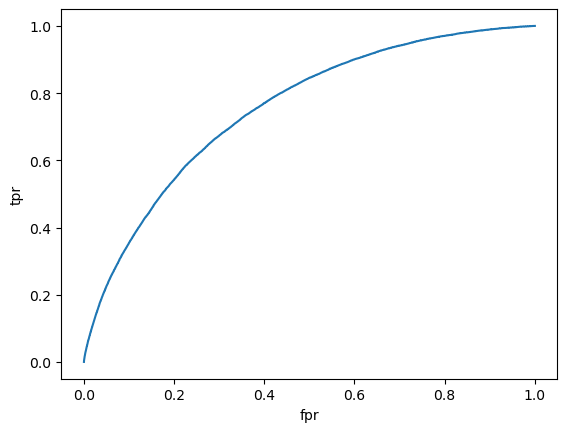

In [17]:
plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')